LAB: Visualización de datos usando Matplotlib
==========================================

In [5]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [127]:
DataFrame = pd.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')
DataFramePoblacionSuma = DataFrame.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
DataFramePoblacionSumaPorcentaje = DataFramePoblacionSuma.copy()
SumaPorRegion = DataFramePoblacionSumaPorcentaje.sum(axis = 0, skipna = True) 


#DataFramePoblacionSumaPorcentaje['Total'] = DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] + DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] +DataFramePoblacionSumaPorcentaje['Poblacion 65+']
#DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 0-14'] * 100 /  SumaPorRegion['Poblacion 0-14'])
#DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 15-64'] * 100 /  SumaPorRegion['Poblacion 15-64'])
#DataFramePoblacionSumaPorcentaje['Poblacion 65+'] =  (DataFramePoblacionSumaPorcentaje['Poblacion 65+'] * 100 /  SumaPorRegion['Poblacion 65+'])

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


Text(0, 0.5, 'Valor')

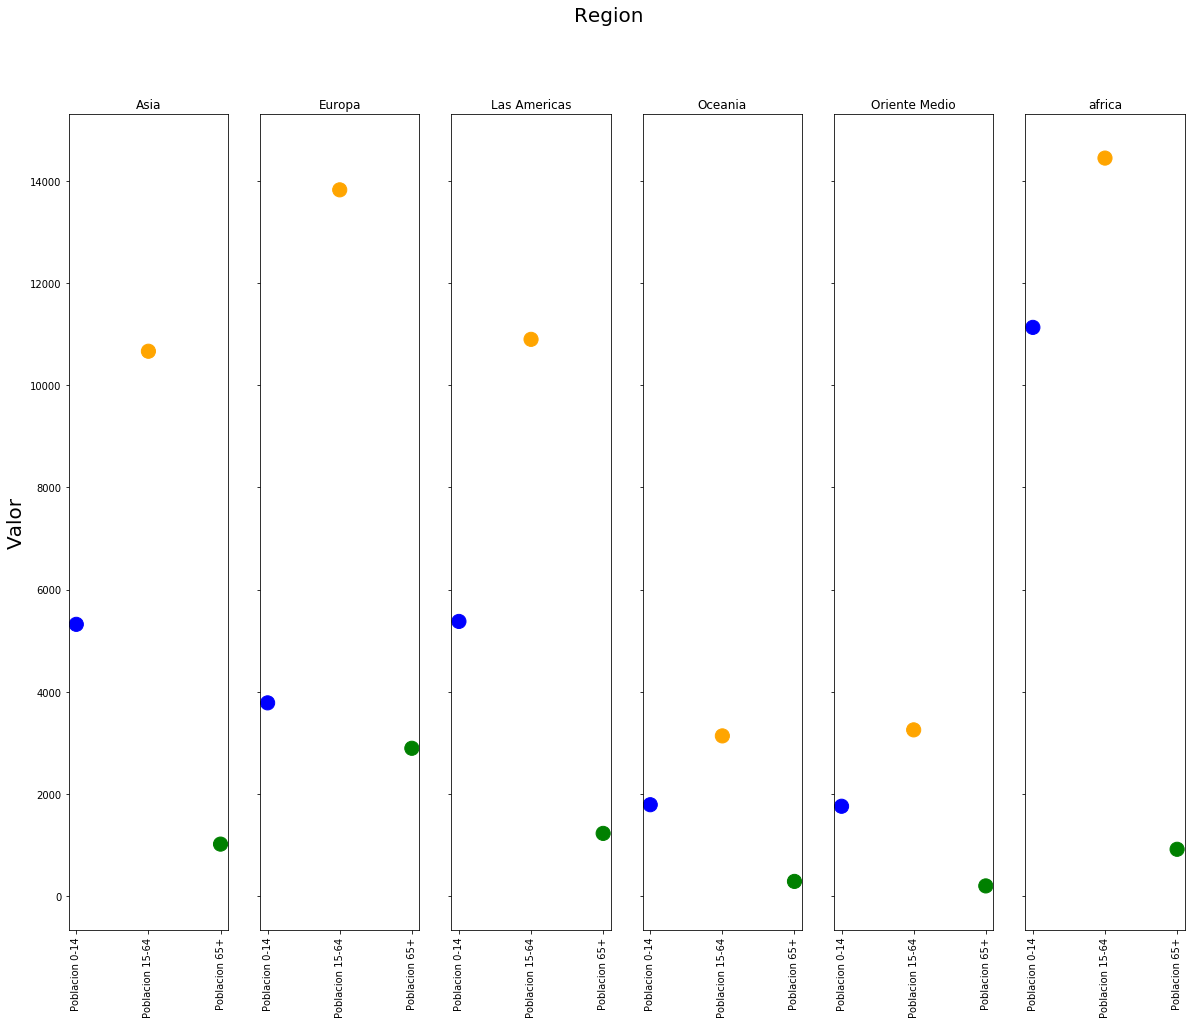

In [137]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap = DataFrameGrap[['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(1, len(indices), figsize=(20, 15), sharey=True)
for indice in indices:
    DataFrameDeIndice = (DataFrameGrap.loc[indice,:])
    data = pd.Series.to_dict(DataFrameDeIndice)
    names = list(data.keys())
    values = list(data.values())
    axs[contador].scatter(names, values,[200,200,200],c=my_colors)
    axs[contador].set_xticklabels(names,rotation='vertical')
    axs[contador].title.set_text(indice)
    contador+=1
fig.suptitle('Region', fontsize=20)
axs[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

---